# A/B Test

A company that owns a website wants to introduce a new feature. Its goal is to determine whether this feature leads to an increase in the average time users spend on the website.

To evaluate this, an A/B test is conducted with two groups:

- **Test Group:** 100 participants who use the website *with* the new feature.  
- **Control Group:** 100 different participants who use the website *without* the new feature.

## Results

- **Test Group:** Average time spent = **16 minutes**, Standard deviation = **2.5 minutes**  
- **Control Group:** Average time spent = **15 minutes**, Standard deviation = **2 minutes**

The observed difference in average time spent is **1 minute**.

## Question

Is this difference statistically significant enough to conclude that the new feature effectively increases user engagement?

P.s. A statistical significance treshold of 95% is used

## Data generation

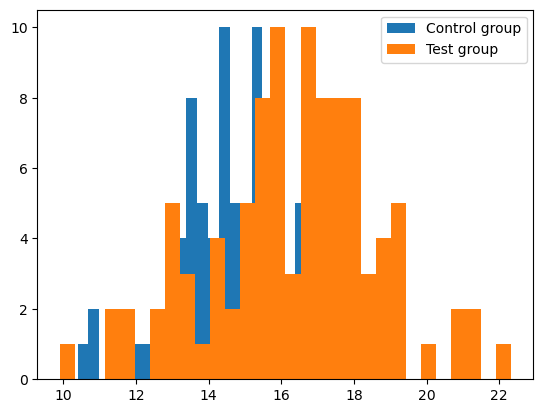

In [3]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)

N = 100

mean_control = 15
mean_test = 16

std_control = 2
std_test = 2.5

control = np.random.normal(loc = mean_control, scale = std_control, size = N)
test = np.random.normal(loc = mean_test, scale = std_test, size = N)

plt.hist(control, bins = 30, label = 'Control group')
plt.hist(test, bins = 30, label = 'Test group')
plt.legend()
plt.show()

## Plan of Action

To determine whether the new feature increases user engagement, we need to assess if there is a **statistically significant difference** between the **means of the two samples**. This requires performing a **hypothesis test for the difference in means**.

### Steps:

1. **Check for Normality:**  
   Determine if the data in both samples follow a **normal distribution**. This can be done using the **Shapiro-Wilk test**.

2. **Assess Variance Homogeneity:**  
   Verify if the two samples have **equal variances** using tests like **Levene's test** or **Bartlett's test**. This will help decide whether to apply a standard t-test (assuming equal variances) or Welch's t-test (assuming unequal variances).

3. **Identify the Relationship Between Samples:**  
   Determine if the samples are **paired** (dependent) or **independent**. In this case, since the test and control groups consist of **different participants**, they are **independent samples**.

4. **Choose the Appropriate Test:**  
   - If both samples are normally distributed and have equal variances, use an **independent samples t-test**.  
   - If normality is violated, consider using a **non-parametric test** like the **Mann-Whitney U test**.  
   - If variances are unequal, apply **Welch’s t-test**.

By following these steps, we can accurately determine whether the observed difference in average time spent on the website is **statistically significant**.


### Normalcy test (Shapiro-Wilk's Test)

In [20]:
from scipy import stats

test_norm = stats.shapiro(test)[1]
control_norm = stats.shapiro(control)[1]

print(test_norm, control_norm)

0.5715968137714403 0.8215451857179022


We can assume normalcy. Therefore, we can use the Levene's test as equal variance test

### Equal Variance test (Levene's Test)

In [24]:
print(stats.levene(test, control)[1])

0.03357053470822663


We cannot assume equal variances. Thus, we can use the Welsh's test for the means. We also know that the populations are independent since no member of group is in the other as well.

### Equal Means test (Welsh's Test)

In [28]:
print(stats.ttest_ind(control, test, equal_var = False)[1])

2.912201882250832e-05


We can conclude that the difference in the means of the two samples is **statistically significant**, allowing us to **reject the null hypothesis**, which states that there is no difference in the population means. Therefore, we can infer that the new feature effectively **increases user engagement**.

Moreover, since the **variance** in the test group is higher, we can conclude that while the **average time spent on the website has increased**, the **duration varies more significantly between users**.
